<a href="https://colab.research.google.com/github/AnnyNny/RL-lab/blob/main/hw_1_game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

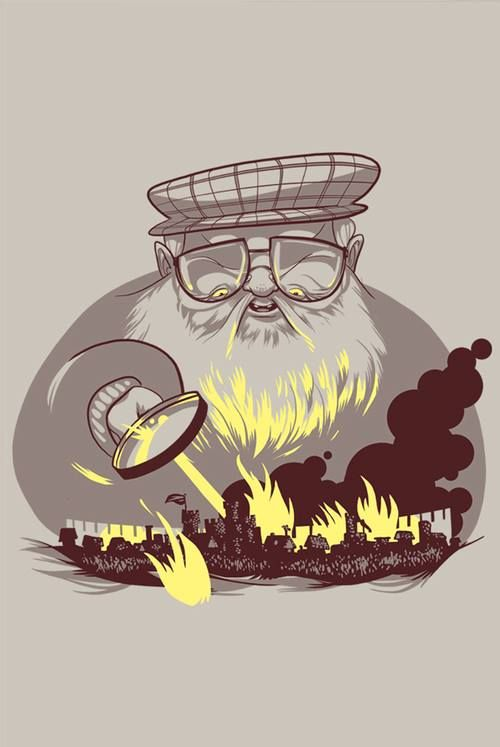

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 44.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 63.2MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
train_data = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')
test_data = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
X_train = train_data.drop(columns=['isAlive'])
y_train = train_data.isAlive
X_test = test_data

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

len(num_cols),len(cat_cols) # Check that all columns are divided in numerical and categorical columns (24 total)

(16, 8)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
for columns in X_train.columns:
  print("% of NaN:", columns, X_train[columns].isna().sum()/len(X_train))


% of NaN: name 0.0
% of NaN: title 0.5394990366088632
% of NaN: male 0.0
% of NaN: culture 0.6865767501605652
% of NaN: dateOfBirth 0.8208092485549133
% of NaN: mother 0.9884393063583815
% of NaN: father 0.9858702633269107
% of NaN: heir 0.9865125240847784
% of NaN: house 0.24470134874759153
% of NaN: spouse 0.8715478484264612
% of NaN: book1 0.0
% of NaN: book2 0.0
% of NaN: book3 0.0
% of NaN: book4 0.0
% of NaN: book5 0.0
% of NaN: isAliveMother 0.9884393063583815
% of NaN: isAliveFather 0.9858702633269107
% of NaN: isAliveHeir 0.9865125240847784
% of NaN: isAliveSpouse 0.8715478484264612
% of NaN: isMarried 0.0
% of NaN: isNoble 0.0
% of NaN: age 0.8208092485549133
% of NaN: numDeadRelations 0.0
% of NaN: popularity 0.0


In [ ]:
"""X_train["has_spouse"] = X_train["spouse"].notna().astype(int)
correlation = X_train["has_spouse"].corr(X_train["isMarried"])
print("Correlation between has_spouse and isMarried:", correlation)

X_train["has_mother"] = X_train["mother"].notna().astype(int)
correlation = X_train["has_mother"].corr(X_train["isAliveMother"].notna().astype(int))
print("Correlation between has_mother and isAliveMother:", correlation)

X_train["has_father"] = X_train["father"].notna().astype(int)
correlation = X_train["has_father"].corr(X_train["isAliveFather"].notna().astype(int))
print("Correlation between has_father and isAliveFather:", correlation)

X_train["has_heir"] = X_train["heir"].notna().astype(int)
correlation = X_train["has_heir"].corr(X_train["isAliveHeir"].notna().astype(int))
print("Correlation between has_heir and isAliveHeir:", correlation)

X_train["has_title"] = X_train["title"].notna().astype(int)
correlation = X_train["has_title"].corr(X_train["isNoble"])
print("Correlation between has_title and isNoble:", correlation)"""


'X_train["has_spouse"] = X_train["spouse"].notna().astype(int)\ncorrelation = X_train["has_spouse"].corr(X_train["isMarried"])\nprint("Correlation between has_spouse and isMarried:", correlation)\n\nX_train["has_mother"] = X_train["mother"].notna().astype(int)\ncorrelation = X_train["has_mother"].corr(X_train["isAliveMother"].notna().astype(int))\nprint("Correlation between has_mother and isAliveMother:", correlation)\n\nX_train["has_father"] = X_train["father"].notna().astype(int)\ncorrelation = X_train["has_father"].corr(X_train["isAliveFather"].notna().astype(int))\nprint("Correlation between has_father and isAliveFather:", correlation)\n\nX_train["has_heir"] = X_train["heir"].notna().astype(int)\ncorrelation = X_train["has_heir"].corr(X_train["isAliveHeir"].notna().astype(int))\nprint("Correlation between has_heir and isAliveHeir:", correlation)\n\nX_train["has_title"] = X_train["title"].notna().astype(int)\ncorrelation = X_train["has_title"].corr(X_train["isNoble"])\nprint("Correl

my note: Correlation about 1.0 means features are collinear, we can safely drop title, mother, father, heir and spouse columns

In [ ]:
def add_indicator_features(df):
    """
    Adds indicator columns for spouse, mother, father, heir, and title.
    df is modified in-place and also returned.
    """
    df["has_title"]  = df["title"].notna().astype(int)
    return df

X_train = add_indicator_features(X_train)
X_test = add_indicator_features(X_test)


In [ ]:
columns_to_drop = [
    'mother', 'father', 'heir', 'spouse', 'name', 'title'
]

def drop_columns(data):
    data_copy = data.copy()
    for column in columns_to_drop:
        data_copy.drop(columns=[column], inplace=True)
    return data_copy

In [ ]:
X_train = drop_columns(X_train)
X_test = drop_columns(X_test)


In [ ]:
X_train.loc[(X_train.age > 0)]

,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,has_title
S.No,,,,,,,,,,,,,,,,,,,
2,1,Rivermen,208.0,House Frey,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
4,0,NaN,82.0,House Arryn,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,1
5,0,Dornish,276.0,House Santagar,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
7,1,Valyrian,183.0,House Targaryen,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,1
23,0,NaN,289.0,Brotherhood Without Banners,0,0,0,1,0,NaN,NaN,NaN,NaN,0,0,16.0,0,0.033445,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1,Northmen,266.0,House Stark,1,1,1,0,1,NaN,NaN,NaN,NaN,0,0,17.0,5,0.354515,0
1546,1,NaN,256.0,House Tyrell,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,49.0,1,0.856187,1
1551,1,NaN,279.0,NaN,1,1,1,1,0,NaN,NaN,NaN,NaN,0,0,21.0,0,0.143813,0


In [ ]:
print(X_train.dateOfBirth.value_counts())
print(X_train.age.value_counts())
corr = X_train['dateOfBirth'].corr(X_train['age'])
print("Correlation:", corr) # coorelation is not very strong, so we can leave both features

imp_age = SimpleImputer(strategy='mean', add_indicator=True)
X_train['age'] = imp_age.fit_transform(X_train[['age']])
X_test['age'] = imp_age.transform(X_test[['age']])

imp_date = SimpleImputer(strategy='most_frequent', add_indicator=True)
X_train['dateOfBirth'] = imp_date.fit_transform(X_train[['dateOfBirth']])
X_test['dateOfBirth'] = imp_date.transform(X_test[['dateOfBirth']])

imp_isalive = SimpleImputer(strategy='constant', add_indicator=True, fill_value=-1)
X_train['isMarried'] = imp_isalive.fit_transform(X_train[['isMarried']])
X_test['isMarried'] = imp_isalive.transform(X_test[['isMarried']])

X_train['isAliveFather'] = imp_isalive.fit_transform(X_train[['isAliveFather']])
X_test['isAliveFather'] = imp_isalive.transform(X_test[['isAliveFather']])

X_train['isAliveMother'] = imp_isalive.fit_transform(X_train[['isAliveMother']])
X_test['isAliveMother'] = imp_isalive.transform(X_test[['isAliveMother']])

X_train['isAliveHeir'] = imp_isalive.fit_transform(X_train[['isAliveHeir']])
X_test['isAliveHeir'] = imp_isalive.transform(X_test[['isAliveHeir']])

X_train['isAliveSpouse'] = imp_isalive.fit_transform(X_train[['isAliveSpouse']])
X_test['isAliveSpouse'] = imp_isalive.transform(X_test[['isAliveSpouse']])

dateOfBirth
286.0    12
290.0    10
283.0    10
281.0     9
285.0     9
         ..
196.0     1
27.0      1
160.0     1
229.0     1
164.0     1
Name: count, Length: 105, dtype: int64
age
100.0    20
19.0     12
20.0     11
15.0     11
16.0     11
         ..
2.0       1
3.0       1
59.0      1
29.0      1
77.0      1
Name: count, Length: 72, dtype: int64
Correlation: -0.5045659061377608


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   male              1557 non-null   int64  
 1   culture           488 non-null    object 
 2   dateOfBirth       1557 non-null   float64
 3   house             1176 non-null   object 
 4   book1             1557 non-null   int64  
 5   book2             1557 non-null   int64  
 6   book3             1557 non-null   int64  
 7   book4             1557 non-null   int64  
 8   book5             1557 non-null   int64  
 9   isAliveMother     1557 non-null   float64
 10  isAliveFather     1557 non-null   float64
 11  isAliveHeir       1557 non-null   float64
 12  isAliveSpouse     1557 non-null   float64
 13  isMarried         1557 non-null   int64  
 14  isNoble           1557 non-null   int64  
 15  age               1557 non-null   float64
 16  numDeadRelations  1557 non-null   int64  
 17  

In [ ]:
X_train.info()
X_train.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   male              1557 non-null   int64  
 1   culture           488 non-null    object 
 2   dateOfBirth       1557 non-null   float64
 3   house             1176 non-null   object 
 4   book1             1557 non-null   int64  
 5   book2             1557 non-null   int64  
 6   book3             1557 non-null   int64  
 7   book4             1557 non-null   int64  
 8   book5             1557 non-null   int64  
 9   isAliveMother     1557 non-null   float64
 10  isAliveFather     1557 non-null   float64
 11  isAliveHeir       1557 non-null   float64
 12  isAliveSpouse     1557 non-null   float64
 13  isMarried         1557 non-null   int64  
 14  isNoble           1557 non-null   int64  
 15  age               1557 non-null   float64
 16  numDeadRelations  1557 non-null   int64  
 17  

,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,has_title
S.No,,,,,,,,,,,,,,,,,,,
1553,1,NaN,286.0,NaN,1,0,1,1,0,-1.0,-1.0,-1.0,-1.0,0,1,35.290323,0,0.160535,1
1554,0,NaN,286.0,NaN,1,1,0,0,0,-1.0,-1.0,-1.0,-1.0,0,0,35.290323,0,0.040134,0
1555,1,NaN,286.0,House Seaworth,0,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,35.290323,0,0.076923,0
1556,0,Crannogmen,283.0,House Reed,0,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,22.000000,0,0.270903,0
1557,0,NaN,264.0,House Hetherspoon,0,0,0,1,1,-1.0,-1.0,-1.0,-1.0,0,0,12.000000,0,0.046823,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
def add_new_features(data):
  data['isPopular'] = (data['popularity'] >= 0.5).astype(int)
  data.drop(columns=['popularity'], inplace=True)
  data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
  data.drop(columns=['numDeadRelations'], inplace=True)

add_new_features(X_train)
add_new_features(X_test)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
def map_culture(value):
    if pd.isna(value):  # Handle NaN values
        return "other"
    value = value.lower()  # Convert to lowercase for matching
    for key, values in cult.items():
        if value in values:
            return key  # Return the standardized name
    return value  # Keep the original value if no match is found

# Apply the mapping function to the 'culture' column
X_train['culture'] = X_train['culture'].apply(map_culture)
X_test['culture'] = X_test['culture'].apply(map_culture)
# Check unique values after mapping
print(X_train['culture'].unique())

['other' 'rivermen' 'Dornish' 'valyrian' 'ironborn' 'Free Folk' 'Northmen'
 'Summer Islands' 'Braavosi' 'dothraki' 'Ghiscari' 'vale mountain clans'
 'Reach' 'tyroshi' 'lhazarene' 'ironmen' 'Qartheen' 'Lysene' 'Westermen'
 'qohor' 'Westerosi' 'Norvoshi' 'meereenese' 'Andal' 'astapori'
 'Stormlander' 'valemen' 'Myrish' 'lhazareen' 'sistermen'
 'northern mountain clans' 'vale' 'crannogmen' 'pentoshi']


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

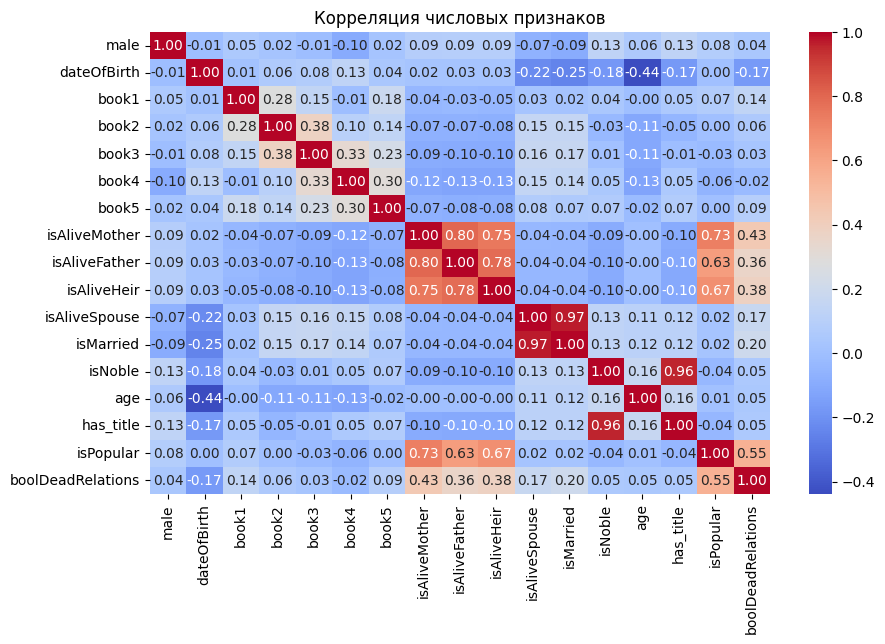

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(X_train.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция числовых признаков")
plt.show()

In [ ]:
"""columns_to_drop = [
    'mother', 'father', 'heir', 'spouse', 'name'
]

def drop_columns(data):
  for column in columns_to_drop:
    data.drop(columns=[column], inplace=True)

drop_columns(X_train)
drop_columns(X_test)"""

"columns_to_drop = [\n    'mother', 'father', 'heir', 'spouse', 'name'\n]\n\ndef drop_columns(data):\n  for column in columns_to_drop:\n    data.drop(columns=[column], inplace=True)\n\ndrop_columns(X_train)\ndrop_columns(X_test)"

In [ ]:
X_train.shape
X_test.shape

(389, 19)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

**целевая переменная является категориальной**, датасет не особо сбалансированный, больше выживших персонажей

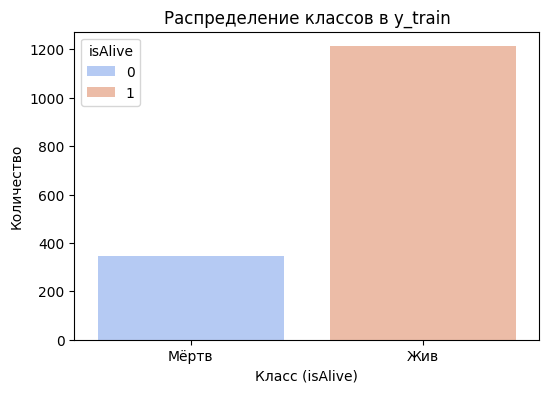

Процент живых персонажей: 77.84%
Процент мёртвых персонажей: 22.16%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = y_train.value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm", hue=class_counts.index)
plt.xlabel("Класс (isAlive)")
plt.ylabel("Количество")
plt.title("Распределение классов в y_train")
plt.xticks([0, 1], ["Мёртв", "Жив"])
plt.show()

alive_ratio = class_counts[1] / class_counts.sum()
print(f"Процент живых персонажей: {alive_ratio:.2%}")
print(f"Процент мёртвых персонажей: {(1 - alive_ratio):.2%}")


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

def preprocess_cat_features(X_train, X_test):
    X_train = X_train.copy()
    X_test = X_test.copy()

    object_cols = ['house', 'culture']

    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
    OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

    OH_cols_train.index = X_train.index
    OH_cols_test.index = X_test.index

    # Remove categorical columns (will replace with one-hot encoding)
    num_X_train = X_train.drop(object_cols, axis=1)
    num_X_test = X_test.drop(object_cols, axis=1)

    # Add one-hot encoded columns to numerical features
    OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
    OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

    # Ensure all columns have string type
    OH_X_train.columns = OH_X_train.columns.astype(str)
    OH_X_test.columns = OH_X_test.columns.astype(str)

    return OH_X_train, OH_X_test


X_train_pro, X_test_pro = preprocess_cat_features(X_train, X_test)



In [ ]:
X_train_pro.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,340,341,342,343,344,345,346,347,348,349
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,286.0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,208.0,1,1,1,1,1,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,286.0,0,0,0,1,0,-1.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,82.0,0,0,0,0,0,-1.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,276.0,0,0,0,1,0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_pro)

X_train_scaled = scaler.transform(X_train_pro)
X_test_scaled = scaler.transform(X_test_pro)

X_train_processed = pd.DataFrame(X_train_scaled, columns=X_train_pro.columns, index=X_train_pro.index)
X_test_processed = pd.DataFrame(X_test_scaled, columns=X_test_pro.columns, index=X_test_pro.index)


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

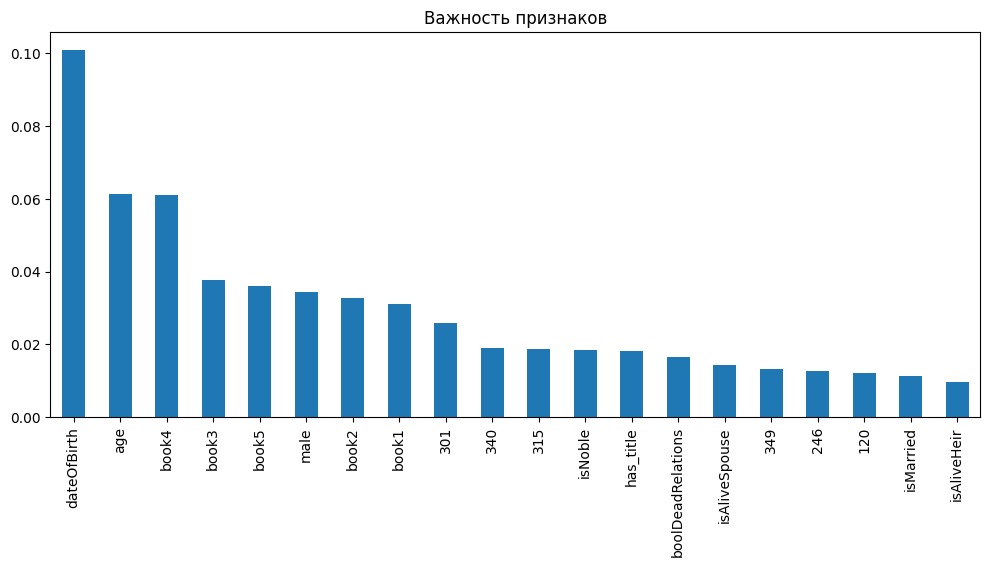

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Обучаем модель Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)

# Важность признаков
feature_importances = pd.Series(rf.feature_importances_, index=X_train_processed.columns)
feature_importances = feature_importances.sort_values(ascending=False)
top_n = 20
feature_importances_top = feature_importances.head(top_n)
feature_importances_top.plot(kind="bar", figsize=(12,5), title="Важность признаков")
plt.show()


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = X_train_processed
y = y_train

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(max_iter=1000,C=1,solver='saga')

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
from sklearn.gaussian_process.kernels import RBF

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

clf_2 = RandomForestClassifier(max_depth=2, random_state=0)
clf_2.fit(X_train, y_train)

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=0).fit(X_train, y_train)


In [ ]:
clf_3 = GaussianNB()
clf_3.fit(X_train, y_train)

GaussianNB()

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
clf_4 = DecisionTreeClassifier(random_state=0)
clf_4.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7628


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = clf.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = clf_2.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7788


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gpc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7853


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = clf_3.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.3846


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = neigh.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7628


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = svc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7660


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = clf_4.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8205


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.6MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
real_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

y_pred = clf_4.predict(X_test_processed)
y_pred
print(len(y_pred), len(submission))
submission["isAlive"] = y_pred



389 389


In [ ]:
submission.sum()

,0
isAlive,278


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)